In [166]:
# Importamos las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
# Cargar los datos desde el archivo CSV
data_path = '/content/precio de la vivienda.csv'
df = pd.read_csv(data_path)

In [122]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [124]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [125]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [126]:
# Cambimos a formato Fecha
df['date'] = pd.to_datetime(df['date'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [128]:
# Verifico si hay datos faltantes
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


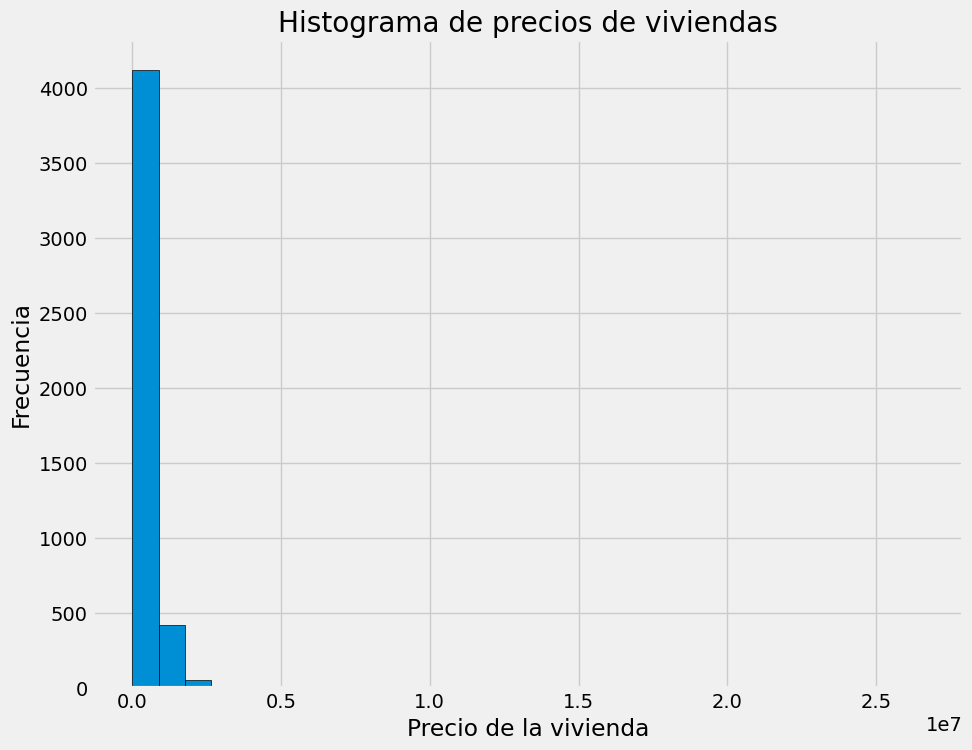

In [129]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de los precios de las viviendas
plt.figure(figsize=(10, 8))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Precio de la vivienda')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios de viviendas')
plt.show()

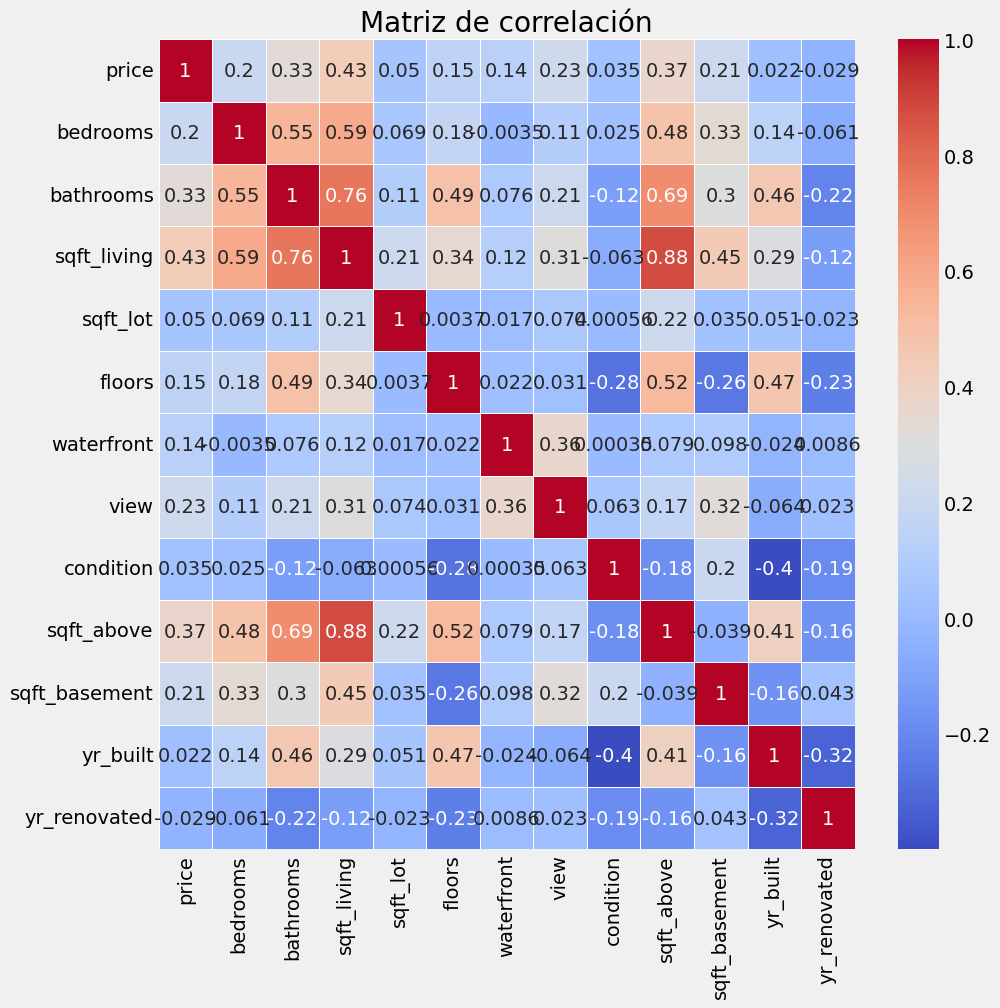

In [130]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de correlación entre variables numéricas
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

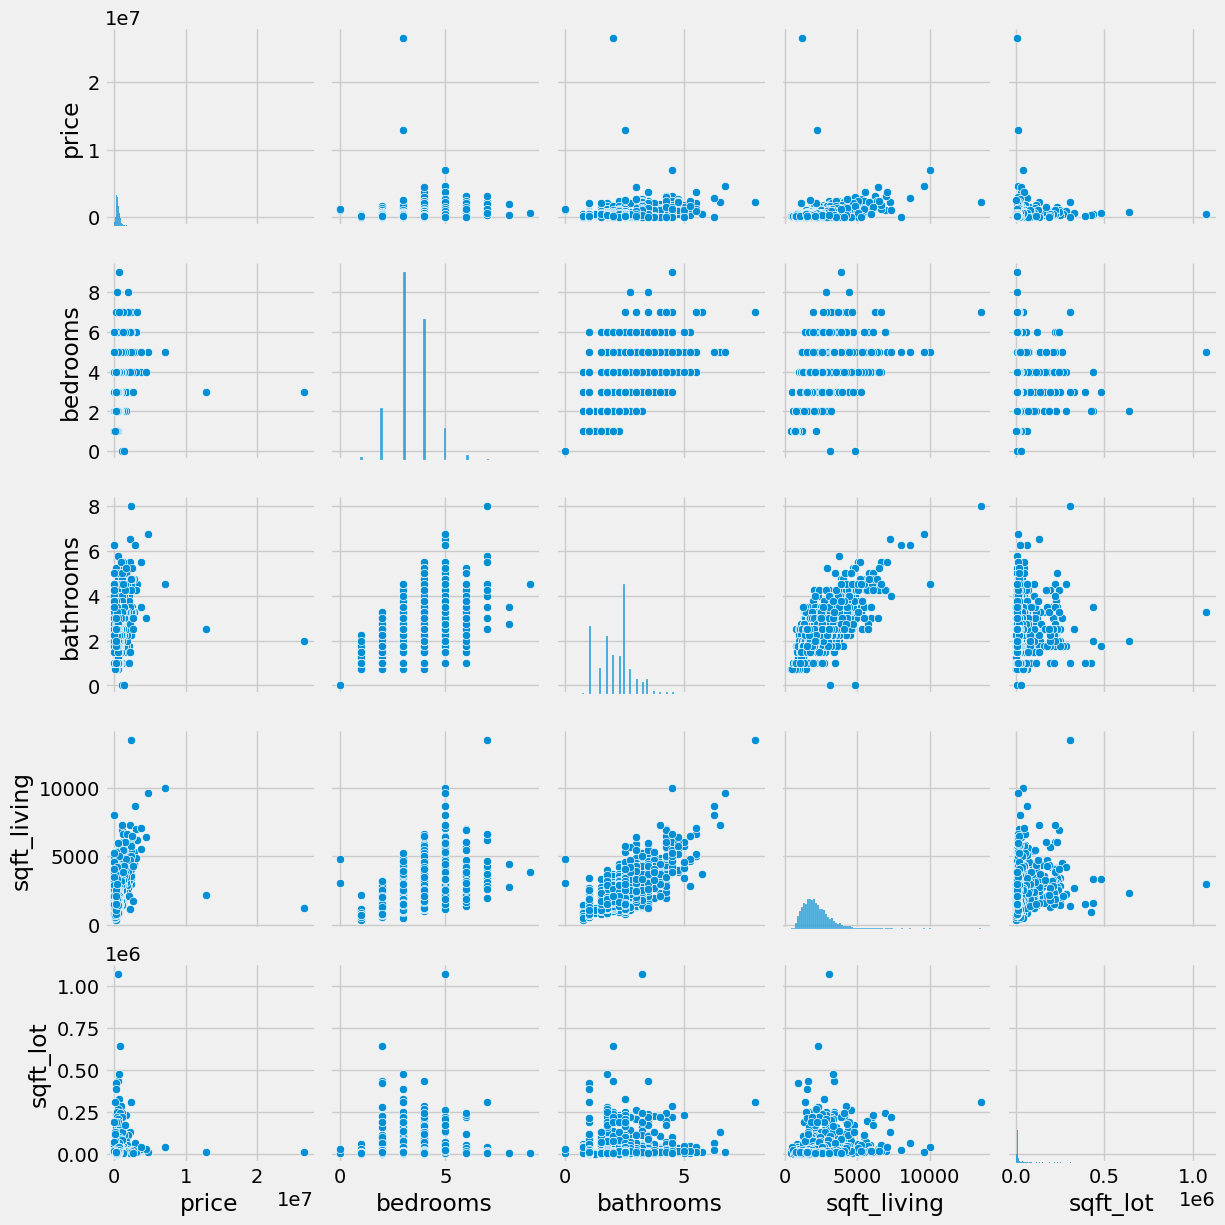

In [131]:
# Gráficos de dispersión para relaciones entre variables
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()

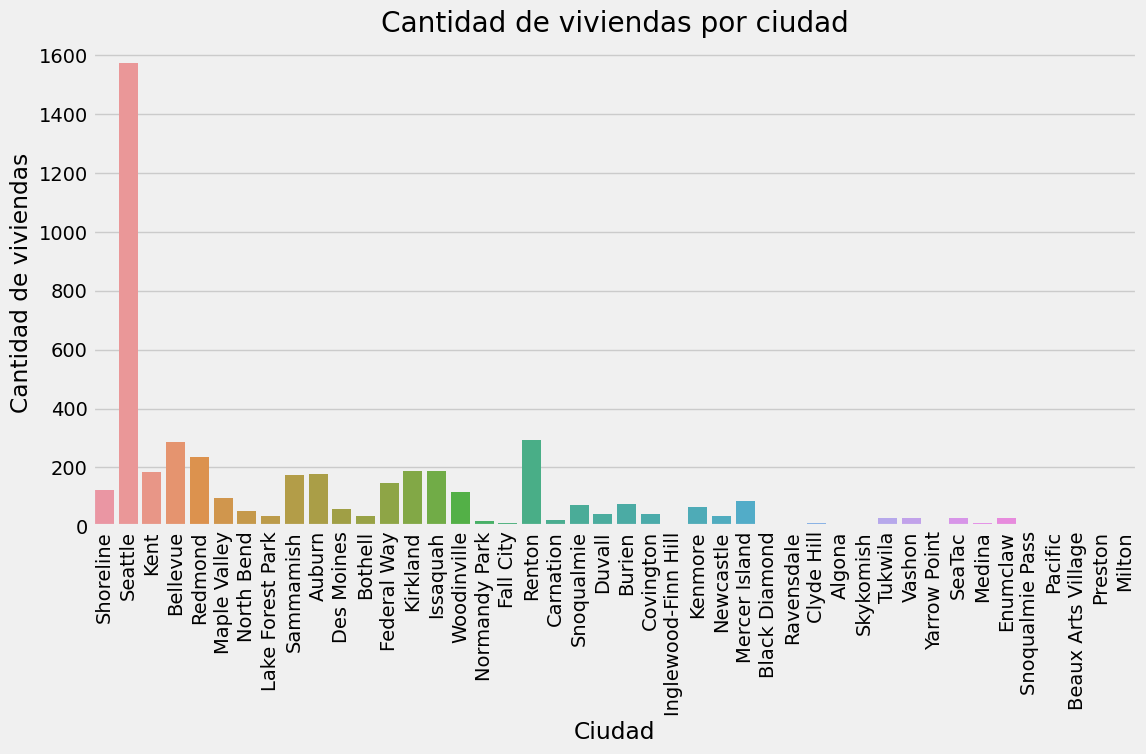

In [132]:
# Gráfico de barras para contar el número de viviendas por ciudad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='city')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de viviendas')
plt.title('Cantidad de viviendas por ciudad')
plt.xticks(rotation=90)
plt.show()


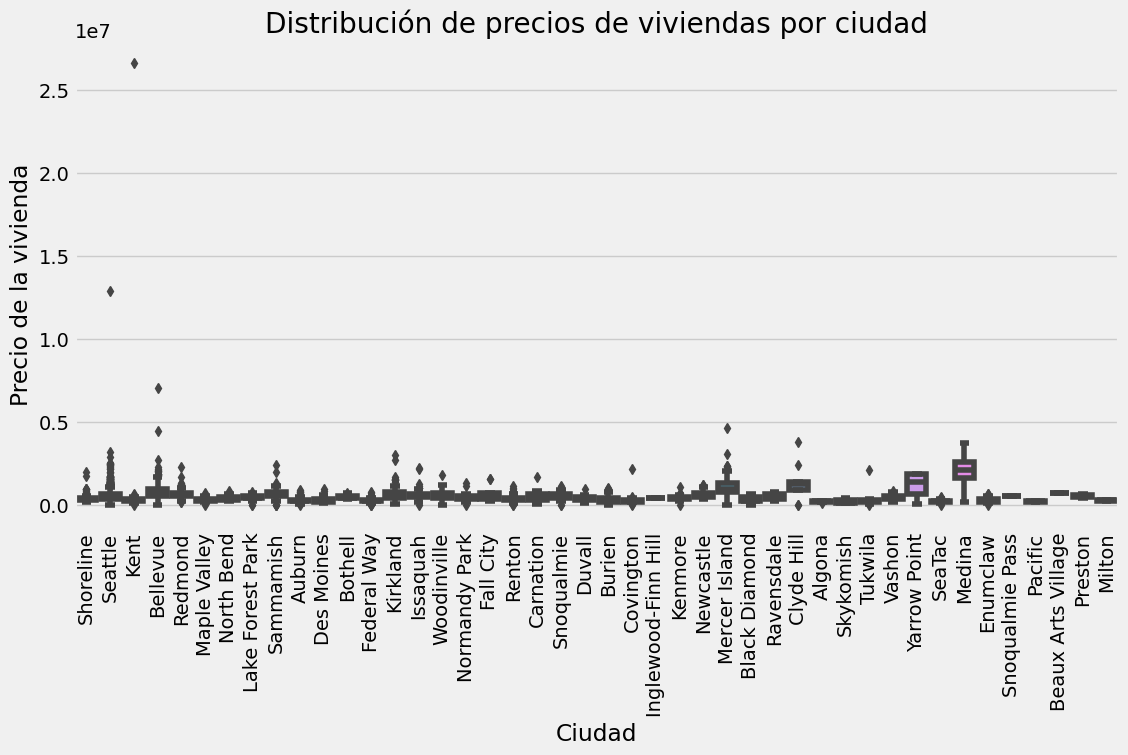

In [133]:
# Boxplot para visualizar la distribución de los precios de las viviendas por ciudad
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='city', y='price')
plt.xlabel('Ciudad')
plt.ylabel('Precio de la vivienda')
plt.title('Distribución de precios de viviendas por ciudad')
plt.xticks(rotation=90)
plt.show()

# Redes Neuronales

In [186]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [135]:
# Extraer características relevantes de las fechas
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Eliminar la columna de fechas original
df = df.drop('date', axis=1)


In [136]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year', 'month', 'day_of_week'],
      dtype='object')

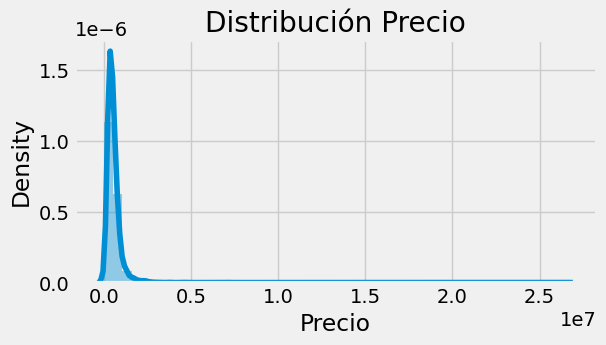

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.distplot(df['price'], kde=True, ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('Precio')
plt.show()


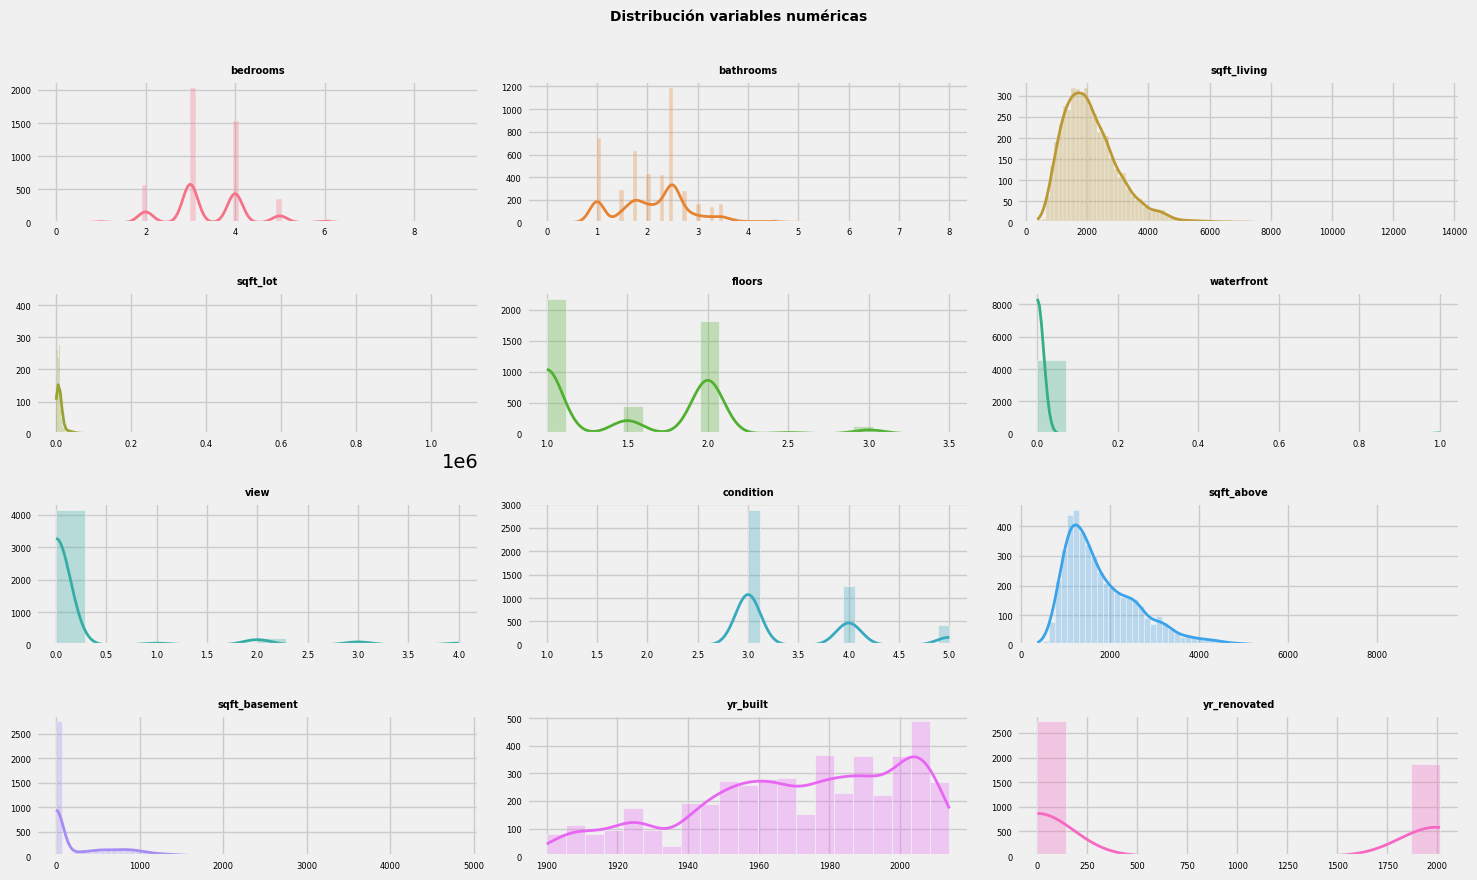

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 9))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('price')
columnas_numeric = columnas_numeric.drop('year')
columnas_numeric = columnas_numeric.drop('month')
columnas_numeric = columnas_numeric.drop('day_of_week')

# Usar la paleta de colores "husl" de seaborn
colors = sns.color_palette("husl", len(columnas_numeric))

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data=df,
        x=colum,
        stat="count",
        kde=True,
        color=colors[i],
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=7, fontweight="bold")
    axes[i].tick_params(labelsize=6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=10, fontweight="bold")
plt.show()


In [139]:
# Valores observados de bedrooms
# ==============================================================================
df.bedrooms = df.bedrooms.astype("str")
df.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [140]:
df.floors = df.floors.astype("str")
df.floors.value_counts()

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

In [141]:
df.condition = df.condition.astype("str")
df.condition.value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [143]:
# Variables cualitativas (tipo object)
# ==============================================================================
df.select_dtypes(include=['object']).describe()

,bedrooms,floors,condition,street,city,statezip,country
count,4600,4600,4600,4600,4600,4600,4600
unique,10,6,5,4525,44,77,1
top,3.0,1.0,3,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,2032,2174,2875,4,1573,148,4600


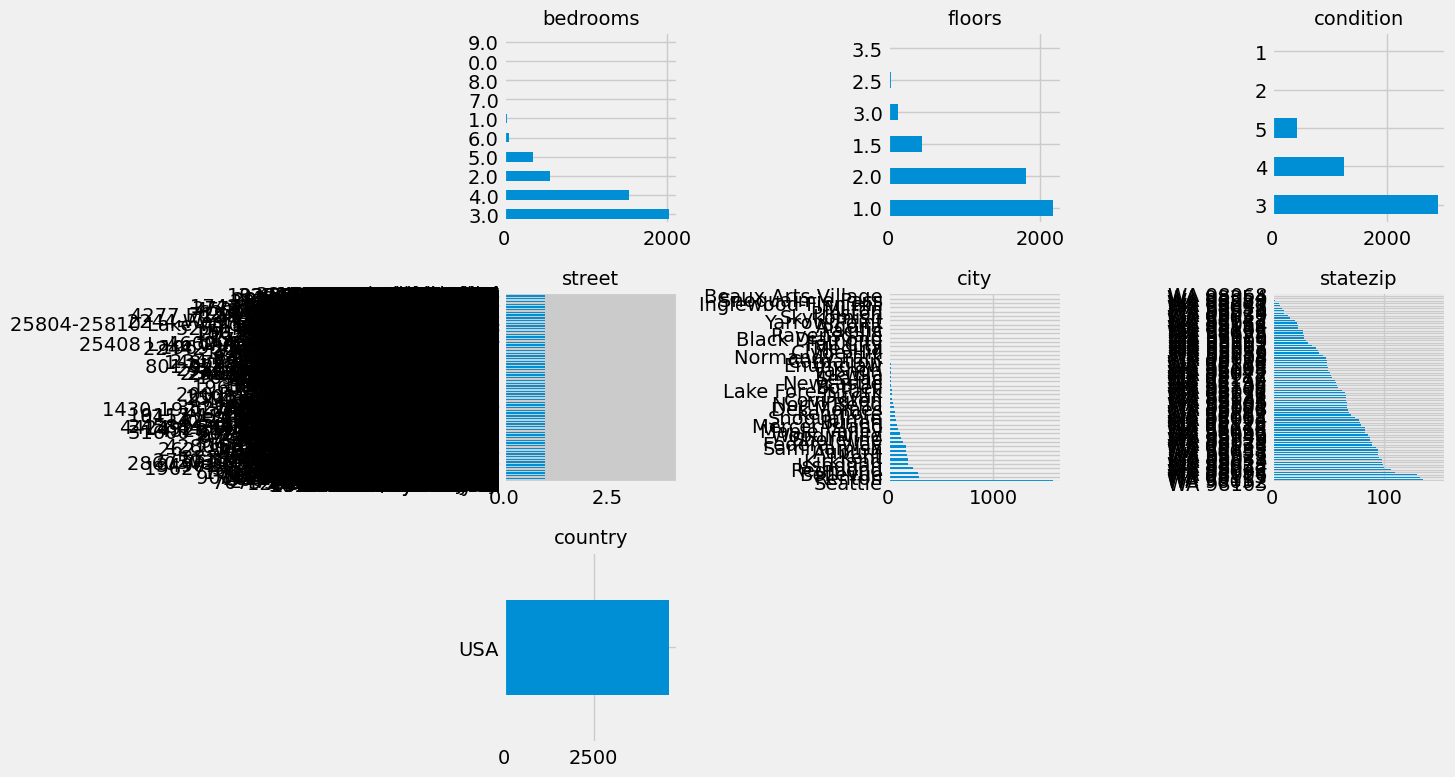

In [148]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()

In [151]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas 'street', 'city' y 'statezip'
df['street_encoded'] = label_encoder.fit_transform(df['street'])
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['statezip_encoded'] = label_encoder.fit_transform(df['statezip'])

# Eliminar las columnas originales 'street', 'city' y 'statezip'
df.drop(columns=['street', 'city', 'statezip'], inplace=True)


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4600 non-null   float64
 1   bedrooms          4600 non-null   object 
 2   bathrooms         4600 non-null   float64
 3   sqft_living       4600 non-null   int64  
 4   sqft_lot          4600 non-null   int64  
 5   floors            4600 non-null   object 
 6   waterfront        4600 non-null   int64  
 7   view              4600 non-null   int64  
 8   condition         4600 non-null   object 
 9   sqft_above        4600 non-null   int64  
 10  sqft_basement     4600 non-null   int64  
 11  yr_built          4600 non-null   int64  
 12  yr_renovated      4600 non-null   int64  
 13  country           4600 non-null   object 
 14  year              4600 non-null   int64  
 15  month             4600 non-null   int64  
 16  day_of_week       4600 non-null   int64  


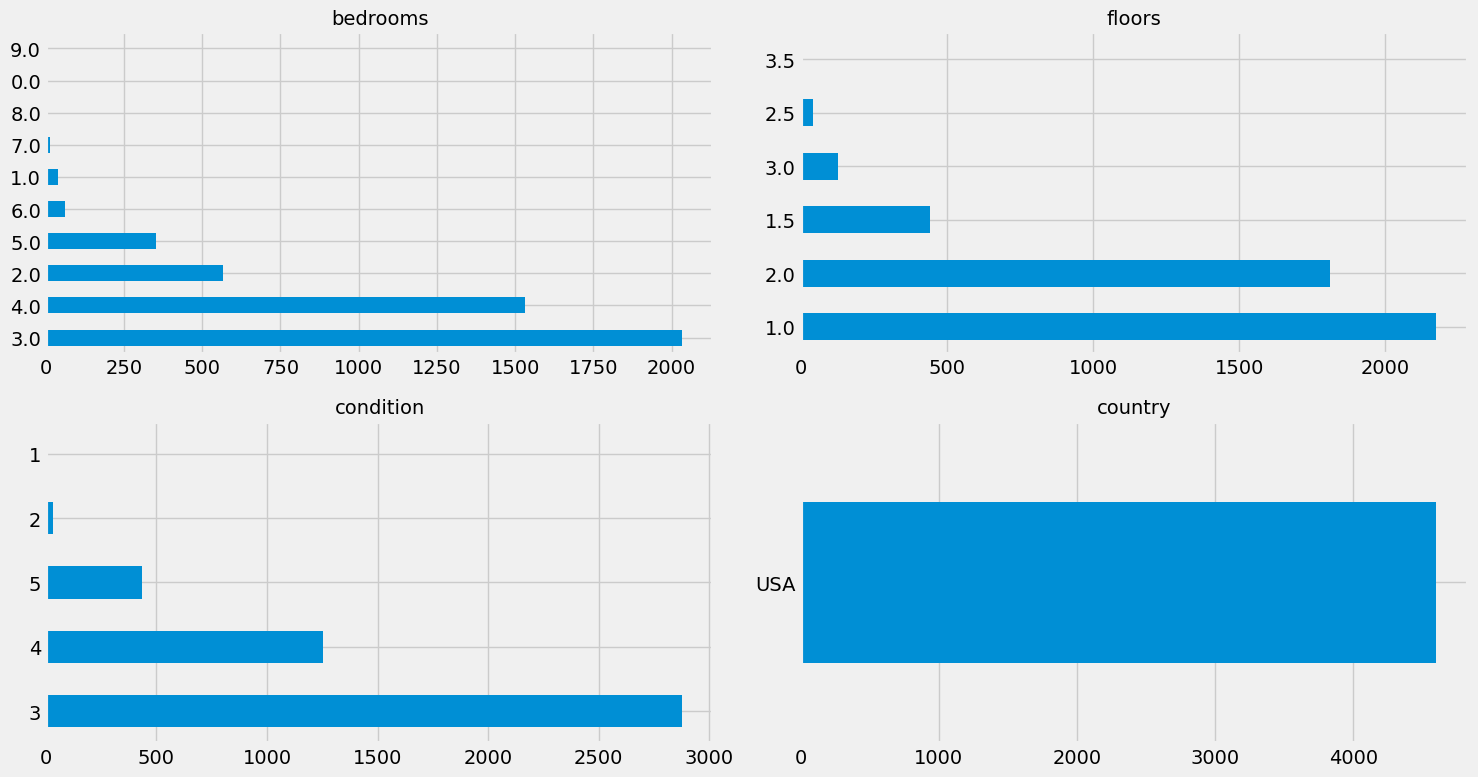

In [156]:
import matplotlib.pyplot as plt

# Gráfico para cada variable cualitativa
# ==============================================================================
columnas_object = df.select_dtypes(include=['object']).columns
num_plots = len(columnas_object)
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))
axes = axes.flat

for i, colum in enumerate(columnas_object):
    if i < num_plots:
        df[colum].value_counts().plot.barh(ax=axes[i])
        axes[i].set_title(colum, fontsize=14)
        axes[i].set_xlabel("")
    else:
        # Si ya hemos creado todos los gráficos, ocultar el subplot vacío.
        fig.delaxes(axes[i])

fig.tight_layout()
plt.show()


In [172]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('price', axis = 'columns'),
                                        df['price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [173]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count    3.680000e+03
mean     5.536148e+05
std      6.014101e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.600000e+05
75%      6.500000e+05
max      2.659000e+07
Name: price, dtype: float64

,bathrooms,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,year,month,day_of_week,street_encoded,city_encoded,statezip_encoded
count,3680.000000,3680.000000,3.680000e+03,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.0,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,2.161345,2137.253261,1.488312e+04,0.007880,0.244837,1825.350543,311.902717,1970.825000,809.648641,2014.0,5.757880,1.994837,2258.471467,25.670652,38.869293
std,0.782646,962.046967,3.706112e+04,0.088433,0.784881,865.396592,461.477509,29.608092,979.598450,0.0,0.684006,1.459697,1315.230598,11.939606,20.913041
min,0.000000,370.000000,6.380000e+02,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,5.000000,0.000000,1.000000,0.000000,0.000000
25%,1.750000,1460.000000,5.014500e+03,0.000000,0.000000,1180.000000,0.000000,1951.000000,0.000000,2014.0,5.000000,1.000000,1107.750000,17.000000,22.000000
50%,2.250000,1970.000000,7.683000e+03,0.000000,0.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0,6.000000,2.000000,2249.500000,32.000000,41.000000
75%,2.500000,2620.000000,1.089250e+04,0.000000,0.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0,6.000000,3.000000,3414.250000,35.000000,56.000000
max,8.000000,13540.000000,1.074218e+06,1.000000,4.000000,9410.000000,4130.000000,2014.000000,2014.000000,2014.0,7.000000,6.000000,4524.000000,43.000000,76.000000


,bedrooms,floors,condition,country
count,3680,3680,3680,3680
unique,10,6,5,1
top,3.0,1.0,3,USA
freq,1624,1740,2311,3680


 
Partición de test
-----------------------


count    9.200000e+02
mean     5.453557e+05
std      3.780472e+05
min      0.000000e+00
25%      3.300000e+05
50%      4.642500e+05
75%      6.600000e+05
max      4.668000e+06
Name: price, dtype: float64

,bathrooms,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,year,month,day_of_week,street_encoded,city_encoded,statezip_encoded
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.0,920.000000,920.000000,920.000000,920.000000,920.000000
mean,2.158696,2147.721739,14730.110870,0.004348,0.223913,1834.925000,312.796739,1970.631522,804.446739,2014.0,5.756522,2.045652,2293.043478,25.689130,38.241304
std,0.788730,968.312660,30748.334968,0.065830,0.752127,849.558068,474.881749,30.237617,979.199995,0.0,0.683603,1.431832,1276.907702,12.160206,20.949248
min,0.750000,420.000000,746.000000,0.000000,0.000000,420.000000,0.000000,1900.000000,0.000000,2014.0,5.000000,0.000000,0.000000,1.000000,0.000000
25%,1.750000,1480.000000,5000.000000,0.000000,0.000000,1207.500000,0.000000,1950.000000,0.000000,2014.0,5.000000,1.000000,1234.500000,16.000000,21.000000
50%,2.250000,1990.000000,7692.500000,0.000000,0.000000,1600.000000,0.000000,1975.000000,0.000000,2014.0,6.000000,2.000000,2323.500000,32.000000,40.000000
75%,2.500000,2620.000000,11319.000000,0.000000,0.000000,2352.500000,600.000000,1997.000000,2000.000000,2014.0,6.000000,3.000000,3355.000000,35.000000,56.000000
max,6.750000,9640.000000,478288.000000,1.000000,4.000000,6640.000000,4820.000000,2014.000000,2014.000000,2014.0,7.000000,6.000000,4508.000000,43.000000,75.000000


,bedrooms,floors,condition,country
count,920,920,920,920
unique,7,5,5,1
top,3.0,1.0,3,USA
freq,408,434,564,920


In [188]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Resto del código...

# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [192]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names_out(input_features=cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = pd.DataFrame(X_train_prep, columns=labels)
datos_train_prep.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bathrooms         3680 non-null   float64
 1   sqft_living       3680 non-null   float64
 2   sqft_lot          3680 non-null   float64
 3   waterfront        3680 non-null   float64
 4   view              3680 non-null   float64
 5   sqft_above        3680 non-null   float64
 6   sqft_basement     3680 non-null   float64
 7   yr_built          3680 non-null   float64
 8   yr_renovated      3680 non-null   float64
 9   year              3680 non-null   float64
 10  month             3680 non-null   float64
 11  day_of_week       3680 non-null   float64
 12  street_encoded    3680 non-null   float64
 13  city_encoded      3680 non-null   float64
 14  statezip_encoded  3680 non-null   float64
 15  bedrooms_0.0      3680 non-null   float64
 16  bedrooms_1.0      3680 non-null   float64


In [195]:
from sklearn.neural_network import MLPRegressor

# Importar MLPRegressor
from sklearn.neural_network import MLPRegressor

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Resto del código para definir numeric_transformer, categorical_transformer y preprocessor

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver='lbfgs', max_iter=1000))])


In [196]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [197]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
3,0.01,10,2.154435,-2.950486e+11,3.657943e+11,-7.562244e+10,2.699670e+10
25,0.01,10,0.001,-2.957997e+11,3.592126e+11,-9.207021e+10,2.161614e+10
0,0.001,10,0.464159,-3.018747e+11,3.655003e+11,-8.964187e+10,2.067578e+10
44,0.01,10,0.464159,-3.044027e+11,3.740233e+11,-8.270676e+10,3.249539e+10
6,0.001,10,0.1,-3.050370e+11,3.631997e+11,-6.881334e+10,2.447547e+10
7,0.001,"(10, 10)",10.0,-3.077368e+11,3.660981e+11,-6.432700e+10,2.738865e+10
36,0.001,"(10, 10)",1000.0,-3.108657e+11,3.634626e+11,-6.707898e+10,2.359406e+10
46,0.01,10,215.443469,-3.120652e+11,3.558106e+11,-8.163871e+10,2.769967e+10
33,0.01,"(10, 10)",2.154435,-3.136773e+11,3.649334e+11,-7.366098e+10,2.824627e+10
43,0.01,"(10, 10)",215.443469,-3.148016e+11,3.590769e+11,-7.417842e+10,2.017485e+10


In [198]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  439540.34698730265


In [199]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 2.154434690031882,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [142]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'year', 'month', 'day_of_week'],
      dtype='object')
